## Wien's Law

<i>© Von P. Walden, Washington State University</i>

In [1]:
%pylab inline
from bt2rad_wv import bt2rad_wv

Populating the interactive namespace from numpy and matplotlib


In [2]:
wv = np.arange(0.1, 100000, 0.05)
T  = np.array([3., 10., 30., 100., 300., 1000., 3000., 10000.])

### Planck Function at mean of the temperature of Earth (288 K)

In [3]:
figure(figsize=(16,8))
loglog(wv,bt2rad_wv(wv,288.))
axis([0.1, 100000, 10e-11, 100]);
xlabel('WAVELENGTH (um)')
ylabel('PLANCK RADIANCE (W m-2 sr-1 um-1)')
title('Planck Functions at mean temperature of Earth (288 K)')

Text(0.5, 1.0, 'Planck Functions at mean temperature of Earth (288 K)')

### Planck Functions at Temperature of Sun and Earth (5800K, 288 K)

In [4]:
figure(figsize=(16,8))
loglog(wv,bt2rad_wv(wv,288.))
loglog(wv,bt2rad_wv(wv,5800.),'r')
axis([0.1, 100000, 10e-11, 10e9]);
xlabel('WAVELENGTH (um)')
ylabel('PLANCK RADIANCE (W m-2 sr-1 um-1)')
title('Planck Functions at Temperatures of Sun and Earth')
legend(['Earth', 'Sun'])

/Users/vonw/anaconda3/envs/work/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/vonw/anaconda3/envs/work/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


### Planck Functions at Temperatures between 3 and 10,000 K

In [5]:
rad3K     = bt2rad_wv(wv,T[0])
rad10K    = bt2rad_wv(wv,T[1])
rad30K    = bt2rad_wv(wv,T[2])
rad100K   = bt2rad_wv(wv,T[3])
rad300K   = bt2rad_wv(wv,T[4])
rad1000K  = bt2rad_wv(wv,T[5])
rad3000K  = bt2rad_wv(wv,T[6])
rad10000K = bt2rad_wv(wv,T[7])

/Users/vonw/work/software/python/utilities/bt2rad_wv.py:38: RuntimeWarning: overflow encountered in exp
  return 2*h*c*c*(wl**-5) / ( np.exp(h*c/(k*wl*bt))-1 ) / 1e6   # Converts from W m-3 to W m-2 um-1


In [6]:
figure(figsize=(16,8))
loglog(wv,rad3K,
       wv,rad10K,
       wv,rad30K,
       wv,rad100K,
       wv,rad300K,
       wv,rad1000K,
       wv,rad3000K,
       wv,rad10000K)
axis([0.1, 100000, 10e-11, 10e10]);
xlabel('WAVELENGTH (um)')
ylabel('PLANCK RADIANCE (W m-2 sr-1 um-1)')
title('Collection of Planck Functions from 3 K to 10,000 K')
legend(['3 K', '10 K', '30 K', '100 K', '300 K', '1000 K', '3000 K', '10000 K'])

### Now place a marker at where the Planck functions peak

In [7]:
max_rad = np.array([max(rad3K),
                    max(rad10K),
                    max(rad30K),
                    max(rad100K),
                    max(rad300K),
                    max(rad1000K),
                    max(rad3000K),
                    max(rad10000K)])
wv_rad  = np.array([wv[max_rad[0] == rad3K],
                    wv[max_rad[1] == rad10K],
                    wv[max_rad[2] == rad30K],
                    wv[max_rad[3] == rad100K],
                    wv[max_rad[4] == rad300K],
                    wv[max_rad[5] == rad1000K],
                    wv[max_rad[6] == rad3000K],
                    wv[max_rad[7] == rad10000K]])

In [8]:
figure(figsize=(16,8))
loglog(wv,rad3K,
       wv,rad10K,
       wv,rad30K,
       wv,rad100K,
       wv,rad300K,
       wv,rad1000K,
       wv,rad3000K,
       wv,rad10000K)
loglog(wv_rad, max_rad,'ko')
axis([0.1, 100000, 10e-11, 10e10]);
xlabel('WAVELENGTH (um)')
ylabel('PLANCK RADIANCE (W m-2 sr-1 um-1)')
title('Collection of Planck Functions from 3 K to 10,000 K')
legend(['3 K', '10 K', '30 K', '100 K', '300 K', '1000 K', '3000 K', '10000 K'])

### Now Wien's Law

#### Plot the wavelengths of maximum emission as a function of temperature.

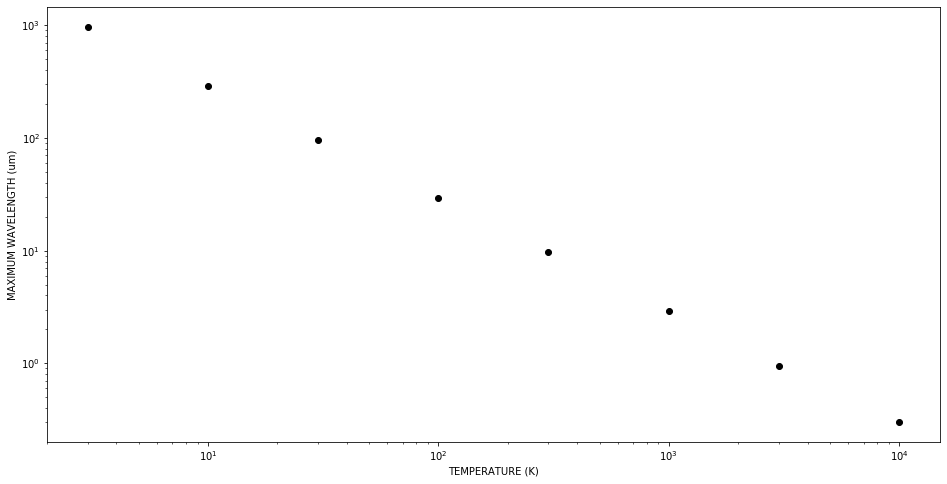

In [9]:
figure(figsize=(16,8))
loglog(T,wv_rad,'ko')
xlabel('TEMPERATURE (K)');
ylabel('MAXIMUM WAVELENGTH (um)');

#### And note that Wien's Law is a fit to this line.

$$ \lambda_{max} = \frac{2897 \mu m K}{T (in K)} $$

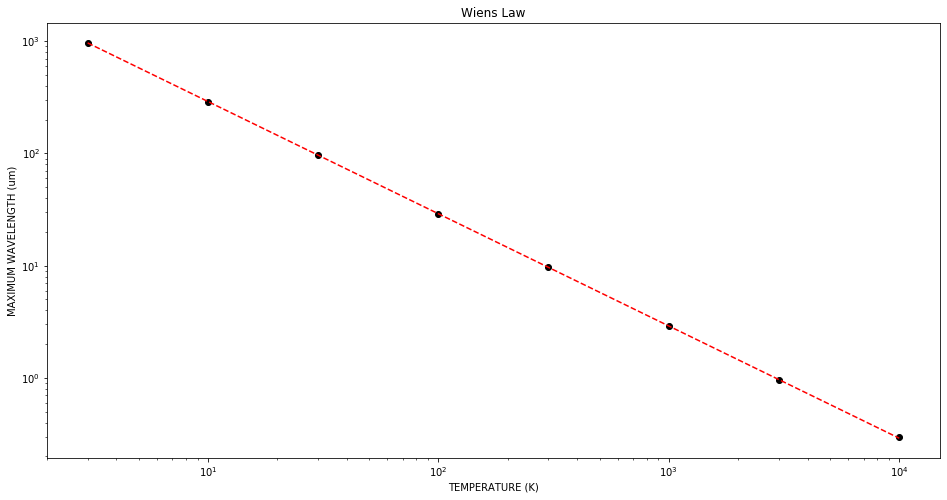

In [10]:
figure(figsize=(16,8))
loglog(T,wv_rad,'ko',T,2897/T,'r--')
xlabel('TEMPERATURE (K)');
ylabel('MAXIMUM WAVELENGTH (um)');
title('Wien''s Law');